In [1]:
#设置中文字体绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 数据整理

In [2]:
#读取出租车OD数据
import pandas as pd
TaxiOD = pd.read_csv(r'data/TaxiOD.csv')
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22223,00:03:23,114.167465,22.562468,114.225235,22.552750,00:10:48
1,22223,00:11:33,114.227150,22.554167,114.229218,22.560217,00:15:19
2,22223,00:17:13,114.231354,22.562166,114.255798,22.590967,00:29:06
3,22223,00:36:45,114.240196,22.563650,114.119965,22.566668,00:54:42
4,22223,01:01:14,114.135414,22.575933,114.166748,22.608267,01:08:17


In [3]:
#对出租车的上客地点栅格化
import math
#划定栅格划分范围
lon1 = 113.75194
lon2 = 114.624187
lat1 = 22.447837
lat2 = 22.864748
latStart = min(lat1, lat2);
lonStart = min(lon1, lon2);
#定义栅格大小(单位m)
accuracy = 500;
#计算栅格的经纬度增加量大小▲Lon和▲Lat
deltaLon = accuracy * 360 / (2 * math.pi * 6371004 * math.cos((lat1 + lat2) * math.pi / 360));
deltaLat = accuracy * 360 / (2 * math.pi * 6371004);
#出租车数据栅格化
TaxiOD['SLONCOL'] = ((TaxiOD['SLng'] - (lonStart - deltaLon / 2))/deltaLon).astype('int')
TaxiOD['SLATCOL'] = ((TaxiOD['SLat'] - (latStart - deltaLat / 2))/deltaLat).astype('int')
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime,SLONCOL,SLATCOL
0,22223,00:03:23,114.167465,22.562468,114.225235,22.552750,00:10:48,85,25
1,22223,00:11:33,114.227150,22.554167,114.229218,22.560217,00:15:19,98,24
2,22223,00:17:13,114.231354,22.562166,114.255798,22.590967,00:29:06,98,25
3,22223,00:36:45,114.240196,22.563650,114.119965,22.566668,00:54:42,100,26
4,22223,01:01:14,114.135414,22.575933,114.166748,22.608267,01:08:17,79,28


In [4]:
#提取数据中的小时
TaxiOD['Hour'] = TaxiOD['Stime'].apply(lambda r:r.split(':')[0])
#集计每小时每个格子的需求量
Gridcount = TaxiOD.groupby(['Hour','SLONCOL','SLATCOL'])['VehicleNum'].count().reset_index()
#将两列栅格编号合并成为一列
Gridcount['grid_id'] = Gridcount['SLONCOL'].astype(str)+'|'+Gridcount['SLATCOL'].astype(str)
Gridcount.head(5)

,Hour,SLONCOL,SLATCOL,VehicleNum,grid_id
0,00,-428,74,1,-428|74
1,00,-393,114,1,-393|114
2,00,-380,118,1,-380|118
3,00,-374,119,1,-374|119
4,00,-97,159,1,-97|159


In [5]:
#利用数据透视表功能将数据转换为矩阵
Gridmatrix = Gridcount.pivot(index = 'Hour',columns = 'grid_id',values = 'VehicleNum')
Gridmatrix.head(10)

grid_id,-101|156,-10|119,-10|85,-11|111,-11|122,-11|85,-11|86,-1272|-451,-13|88,-143|275,...,9|61,9|64,9|65,9|66,9|67,9|68,9|69,9|70,9|79,9|82
Hour,,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#统计每个栅格有多少天的数值为空值
nulldays = Gridmatrix.isnull().sum()
nulldays

grid_id
-101|156    23
-10|119     23
-10|85      23
-11|111     23
-11|122     23
            ..
9|68        21
9|69        19
9|70        20
9|79        23
9|82        23
Length: 3553, dtype: int64

In [7]:
#保留空值少于5天的栅格，也就是矩阵中的列
retaindays = nulldays[nulldays<5].index
#补充空值为0
Gridmatrix = Gridmatrix[retaindays].fillna(0)
Gridmatrix.head(10)

grid_id,100|26,100|59,100|60,100|61,100|62,100|63,101|61,101|62,101|67,102|59,...,98|63,98|67,99|25,99|57,99|58,99|59,99|60,99|61,99|62,99|63
Hour,,,,,,,,,,,,,,,,,,,,,
00,2.0,20.0,13.0,2.0,8.0,1.0,5.0,55.0,6.0,1.0,...,4.0,3.0,6.0,1.0,3.0,12.0,7.0,12.0,11.0,3.0
01,2.0,9.0,4.0,2.0,0.0,0.0,1.0,63.0,1.0,3.0,...,3.0,2.0,2.0,0.0,6.0,3.0,1.0,2.0,6.0,1.0
02,1.0,7.0,0.0,1.0,5.0,2.0,0.0,35.0,3.0,1.0,...,2.0,1.0,6.0,1.0,6.0,7.0,0.0,2.0,6.0,1.0
03,2.0,2.0,0.0,1.0,3.0,0.0,1.0,33.0,0.0,3.0,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0
04,0.0,2.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,...,1.0,0.0,2.0,0.0,3.0,2.0,0.0,0.0,3.0,0.0
05,1.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,...,4.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0
06,0.0,3.0,1.0,2.0,1.0,2.0,0.0,2.0,5.0,2.0,...,2.0,3.0,2.0,0.0,0.0,2.0,1.0,1.0,3.0,3.0
07,0.0,15.0,2.0,2.0,5.0,6.0,1.0,6.0,3.0,2.0,...,15.0,3.0,5.0,4.0,1.0,10.0,7.0,9.0,14.0,7.0
08,1.0,32.0,6.0,7.0,9.0,4.0,0.0,10.0,4.0,3.0,...,22.0,5.0,11.0,4.0,5.0,24.0,16.0,31.0,22.0,5.0


In [8]:
#提取表中的值，变为numpy中的矩阵
M = Gridmatrix.values
M

array([[ 2., 20., 13., ..., 12., 11.,  3.],
       [ 2.,  9.,  4., ...,  2.,  6.,  1.],
       [ 1.,  7.,  0., ...,  2.,  6.,  1.],
       ...,
       [ 1., 57., 39., ..., 26., 29.,  4.],
       [ 5., 53., 50., ..., 52., 31.,  8.],
       [ 7., 48., 40., ..., 29., 20.,  2.]])

In [9]:
#矩阵的大小
M.shape

(24, 1000)

# SVD分解

In [10]:
#进行SVD分解
import numpy as np
U,sigma,VT = np.linalg.svd(M)
#调整ui和vi向量的正负，保持ui向量中绝对值最大者为正
for i in range(U.shape[0]):
    ui = U[:,i]
    flag = np.sign(ui[abs(ui) == abs(ui).max()])
    U[:,i] = flag*U[:,i]
    VT[i,:] = flag*VT[i,:]

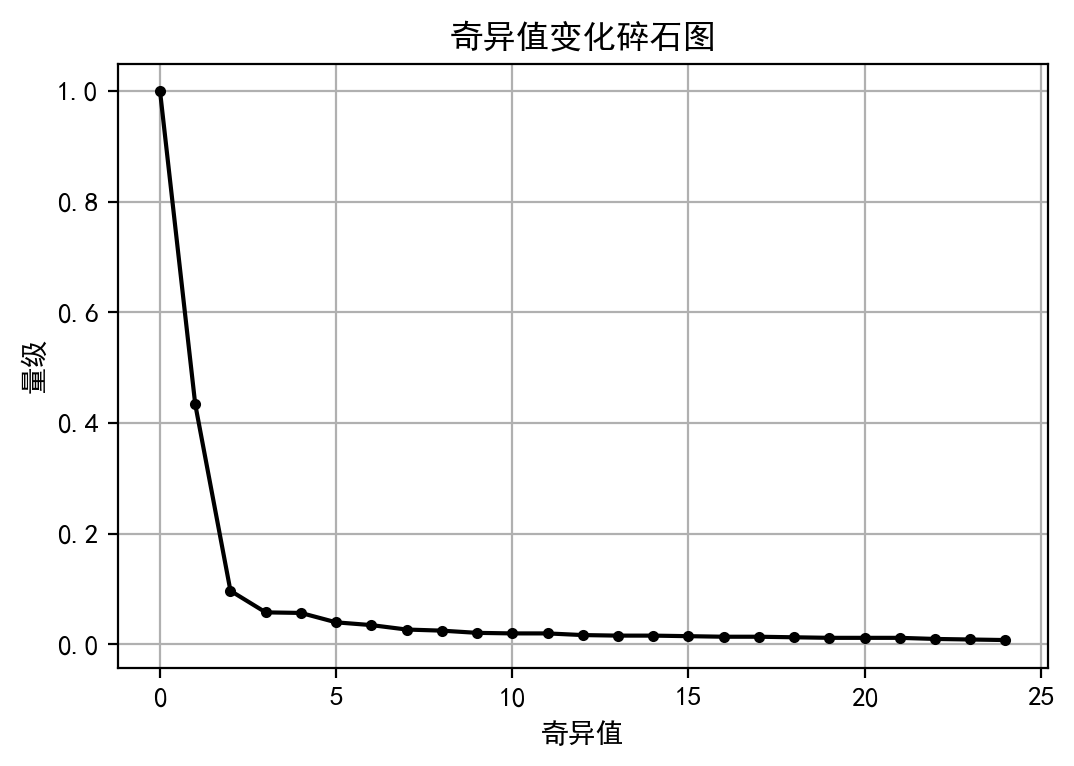

In [11]:
#绘制奇异值变化的碎石图
#标准化奇异值
nsigma = (sigma/sum(sigma)).round(3)
#创建图
import matplotlib.pyplot as plt
plt.figure(1,(6,4),dpi = 200)
#绘制奇异值量级变化的曲线
plt.plot(range(0,len(nsigma)+1),[1]+list(nsigma),'k-',range(0,len(nsigma)+1),[1]+list(nsigma),'k.')
plt.grid()
plt.title('奇异值变化碎石图')
plt.xlabel('奇异值')
plt.ylabel('量级')
plt.show()

# 可视化时间向量

In [35]:
#选取第i个模式
i = 1
#提取时间向量，与矩阵的index对应，创建DataFrame
U_pattern = pd.DataFrame([U[:,i],Gridmatrix.index]).T
#更改数据的列名
U_pattern.columns = ['U','Hour']
U_pattern['Hour'] = U_pattern['Hour'].astype(int).astype(str)
U_pattern.head(5)

,U,Hour
0,0.358284,0
1,0.427802,1
2,0.308697,2
3,0.208836,3
4,0.162428,4


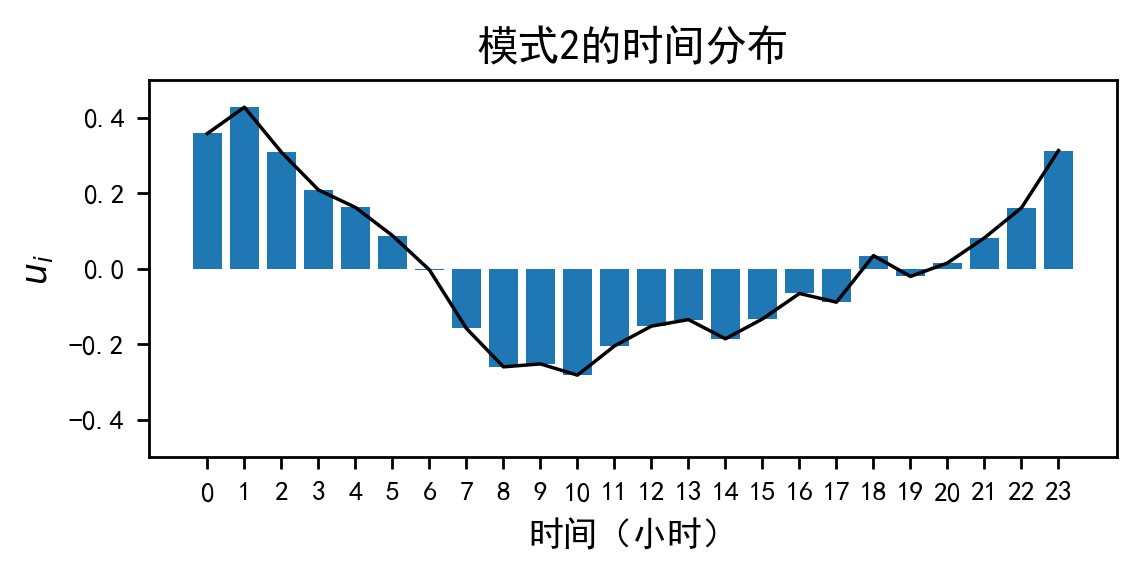

In [36]:
#绘制时间向量
#创建图
import matplotlib.pyplot as plt
fig     = plt.figure(1,(5,2),dpi = 250)    
ax      = plt.subplot(111)
#绘制柱状图和折线图
plt.bar(U_pattern['Hour'],U_pattern['U'])
plt.plot(U_pattern['Hour'],U_pattern['U'],'k',lw = 1)
#设定图参数
plt.ylim(-0.5,0.5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('时间（小时）')
plt.ylabel('$u_i$')
plt.title('模式'+str(i+1)+'的时间分布')
plt.show()

# 可视化空间向量

In [37]:
import geopandas as gpd
#读取栅格地理信息文件
grid = gpd.GeoDataFrame.from_file(r'data/gis/grid.shp',encoding = 'utf-8')
#读取行政区划边界文件
sz = gpd.GeoDataFrame.from_file(r'data/gis/sz.shp',encoding = 'utf-8')

In [38]:
#选取第i个空间向量，与矩阵的columns对应，得到栅格信息
V_pattern = pd.DataFrame([VT.T[:,i],Gridmatrix.columns]).T
#更改数据的列名
V_pattern.columns = ['V','grid_id']
#拆分出栅格信息
V_pattern['LONCOL'] = V_pattern['grid_id'].apply(lambda r:r.split('|')[0]).astype(int)
V_pattern['LATCOL'] = V_pattern['grid_id'].apply(lambda r:r.split('|')[1]).astype(int)
V_pattern['V'] = V_pattern['V'].astype(float)
#与栅格地理信息连接
grid_toplot = pd.merge(grid,V_pattern,on = ['LONCOL','LATCOL'])
grid_toplot.head(5)

,LONCOL,LATCOL,HBLON,HBLAT,geometry,V,grid_id
0,10,63,113.798230,22.728875,"POLYGON ((113.79579 22.72663, 113.79579 22.731...",0.002310,10|63
1,11,39,113.803102,22.620956,"POLYGON ((113.80067 22.61871, 113.80067 22.623...",0.001208,11|39
2,11,54,113.803102,22.688405,"POLYGON ((113.80067 22.68616, 113.80067 22.690...",0.000264,11|54
3,12,39,113.807975,22.620956,"POLYGON ((113.80554 22.61871, 113.80554 22.623...",0.005183,12|39
4,12,40,113.807975,22.625453,"POLYGON ((113.80554 22.62320, 113.80554 22.627...",0.370910,12|40


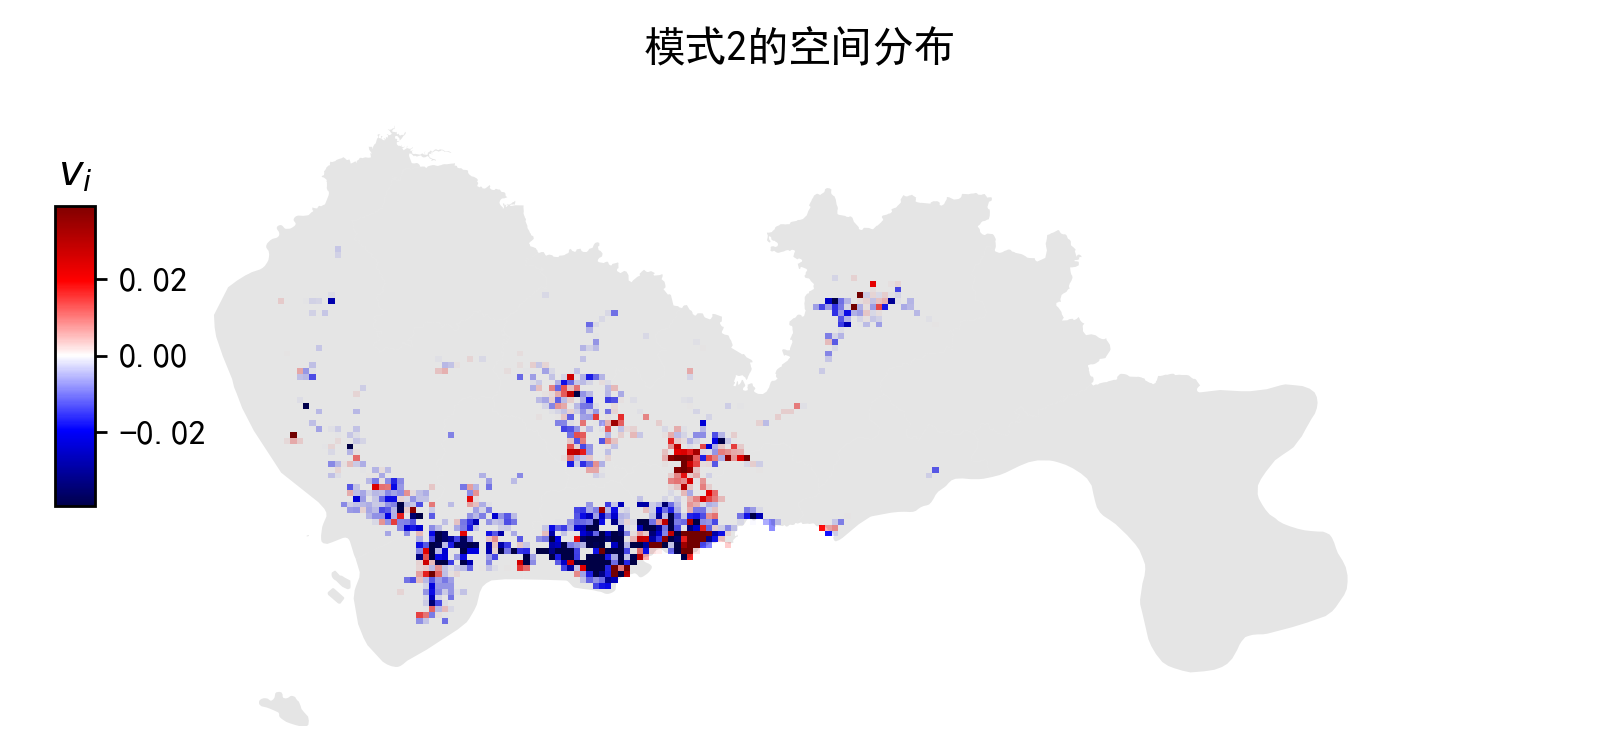

In [41]:
#创建图
import matplotlib.pyplot as plt
fig = plt.figure(1,(8,4),dpi = 250)
ax = plt.subplot(111)
plt.sca(ax)
#设定地理范围
bounds = [113.6,22.4,114.8,22.9]
#设定色标最大值
vmax = abs(grid_toplot['V']).quantile(0.9)
#绘制栅格
grid_toplot.plot(ax = ax,column = 'V',cmap = 'seismic',vmin = -vmax,vmax = vmax,)
#绘制深圳边界
sz.plot(ax = ax,edgecolor = (0,0,0,0),facecolor = (0,0,0,0.1),linewidths=0.5)
#设置显示范围
plt.axis('off')
ax.set_xlim(bounds[0],bounds[2])
ax.set_ylim(bounds[1],bounds[3])
#加上标题
plt.title('模式'+str(i+1)+'的空间分布')
#设置色标
plt.imshow([[-vmax,vmax]], cmap='seismic')
cax = plt.axes([0.14, 0.4, 0.02, 0.3])
plt.colorbar(cax=cax)
plt.title('$v_i$')
plt.show()